<center>

<h1>

**_Marketing Analytics_**

**_Survival Analysis_**

**Elen Galoyan**

</h1>

</center>


##  Build AFT models with all the available distributions

Let's import the necessary libraries first.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, ExponentialFitter
from lifelines.utils import k_fold_cross_validation
import seaborn as sns
import warnings
import lifelines

Let's read the data.

In [31]:
data_path = 'telco.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


To build models based on this data we need to convert the non-numeric columns into numeric columns. Here we have the columns region, marital, ed, retire, gender, voice, internet, forward, custcat and churn. Those columns need to be converted into dummies. 

Let's work with the copy of the data. We should do one-hot encoding and get dummies for those columns.

In [32]:
data_processed = raw_data.copy()
data_processed.drop(['ID'], axis=1, inplace=True)
cols = ['region', 'retire', 'marital', 'ed', 'gender', 'voice', 'internet', 'custcat', 'churn', 'forward']
data_processed = pd.get_dummies(data_processed, columns=cols, drop_first=True)

data_processed.head()

,tenure,age,address,income,region_Zone 2,region_Zone 3,retire_Yes,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,gender_Male,voice_Yes,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes,forward_Yes
0,13,44,9,64,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
1,11,33,7,136,False,True,False,False,False,False,True,False,True,True,False,False,False,True,True,True
2,68,52,24,116,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False
3,33,33,12,33,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
4,23,30,9,30,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True


Among the AFT models the following models will be built:

Exponential

Weibull

Cauchy

Normal distribution

In [63]:
weibull_model = WeibullAFTFitter()
log_norm_model = LogNormalAFTFitter()
log_logistic_model = LogLogisticAFTFitter()
exponential_model = ExponentialFitter()

**Exponential**

In [72]:
exponential_model = ExponentialFitter()
exponential_model.fit(data_processed['tenure'], event_observed=data_processed['churn_Yes'])
average_survival_function = np.exp(-exponential_model.lambda_ * data_processed['tenure'])
expon_survival_mean = average_survival_function.mean()


In [75]:
exponential_model.summary

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,129.656934,7.832862,114.304807,145.009061,0.0,16.552945,1.524577e-61,202.029205


**Weibull Model** 

In [34]:
data_processed.columns

Index(['tenure', 'age', 'address', 'income', 'region_Zone 2', 'region_Zone 3',
       'retire_Yes', 'marital_Unmarried', 'ed_Did not complete high school',
       'ed_High school degree', 'ed_Post-undergraduate degree',
       'ed_Some college', 'gender_Male', 'voice_Yes', 'internet_Yes',
       'custcat_E-service', 'custcat_Plus service', 'custcat_Total service',
       'churn_Yes', 'forward_Yes'],
      dtype='object')

In [35]:
weibull = weibull_model.fit(data_processed, duration_col='tenure', event_col='churn_Yes')
weibull_prediction = weibull.predict_survival_function(data_processed).T
weibull_prediction_avg = weibull_prediction.mean()
weibull.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2024-05-01 14:49:20 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service       

**Log Normal**

In [36]:
log_norm = log_norm_model.fit(data_processed, duration_col='tenure', event_col='churn_Yes')
log_norm_prediction = log_norm.predict_survival_function(data_processed).T
log_norm_prediction_avg = log_norm_prediction.mean()
log_norm.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2024-05-01 14:49:21 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005  

**Log logistic**

In [37]:
log_logistic = log_logistic_model.fit(data_processed, duration_col='tenure', event_col='churn_Yes')
log_logistic_prediction = log_logistic.predict_survival_function(data_processed).T
log_logistic_prediction_avg = log_logistic_prediction.mean()
log_logistic.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2024-05-01 14:49:22 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005

## Compare the models.

There are several criteria to understand which model is the best. Here the best AIC will be considered the best. AIC, or Akaike Information Criterion, is a measure used in statistical modeling to compare the goodness of fit of different models. AIC helps us choose the best model by considering two things: how well the model fits the data and how complicated the model is. It wants a model that explains the data accurately but not one that's too complicated. So, we calculate the AIC for each model and pick the one with the lowest AIC because it balances accuracy and simplicity the best. This means it's a good balance between explaining the data well and not being too complex.

In [77]:
# print(f'Exponential AIC: {exponential.AIC_}')
print(f'Log-Normal AIC: {log_norm.AIC_}')
print(f'Log-Logistic AIC: {log_logistic.AIC_}')
print(f'Weibull AIC: {weibull.AIC_}')
scores = {
    'Log-Normal': log_norm.AIC_,
    'Log-Logistic': log_logistic.AIC_,
    'Weibull': weibull.AIC_
}

best_model = min(scores, key=scores.get)

# Print the result
print(f"The best model based on AIC scores is: {best_model}")

Log-Normal AIC: 2944.200662919656
Log-Logistic AIC: 2956.2085614433336
Weibull AIC: 2964.343248083881
The best model based on AIC scores is: Log-Normal


In all distributions we have parameters to estimate and the parameters define the shape and accuracy of the distribution. Exponential model is the least complex because it has only one parameter. In contrast, the Log-Normal and Log-Logistic models have three parameters each, while the Weibull model has two parameters. So the Exponential model will be the less complec model here.

We can also consider the hazard rate. The hazard rate represents the instantaneous rate of occurrence of an event. For example, in survival analysis, it could represent the risk of failure at a given time. The Weibull model may be preferred over the Exponential model if the data exhibits a non-constant hazard rate. This is because the Weibull model can capture both increasing and decreasing hazard rates, providing more flexibility in modeling complex survival data.

The explanation weighs different factors such as the complexity of models and the behavior of the hazard rate, but ultimately prioritizes the AIC score as the criterion for selecting the best-performing model, leading to the choice of the Log-Normal model in this scenario.

## Visualize all the curves: one plot for all

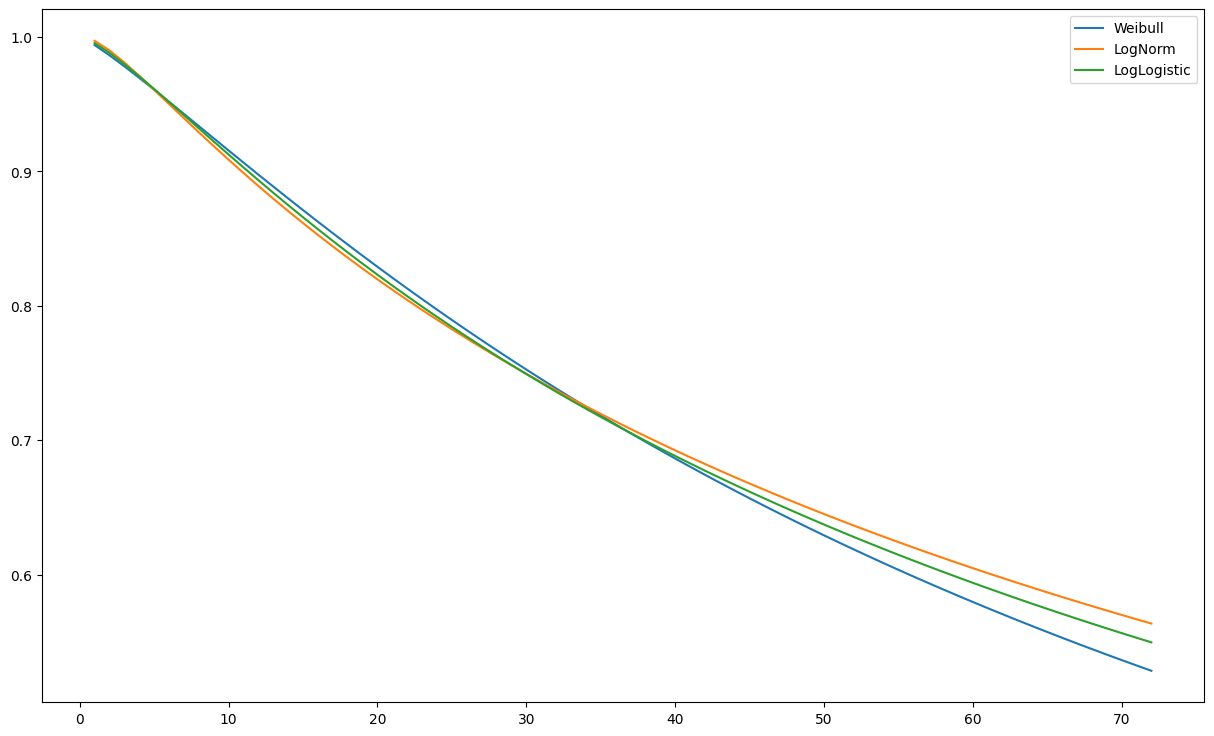

In [79]:
plt.figure(figsize=(15,9))
plt.plot(weibull_prediction_avg, label='Weibull')
plt.plot(log_norm_prediction_avg, label='LogNorm')
plt.plot(log_logistic_prediction_avg, label='LogLogistic')
plt.legend()
plt.show()

## Keep significant features

Let's look at the p-values with greatest significance and understand which variables have the most significant coefficients.

In [41]:
significant_features = ['address', 'age', 'custcat_E-service', 'custcat_Plus service', 'custcat_Total service', 'internet_Yes', 'marital_Unmarried', 'voice_Yes', 'churn_Yes', 'tenure']
final_data = data_processed[significant_features]
final_data.head()

,address,age,custcat_E-service,custcat_Plus service,custcat_Total service,internet_Yes,marital_Unmarried,voice_Yes,churn_Yes,tenure
0,9,44,False,False,False,False,False,False,True,13
1,7,33,False,False,True,False,False,True,True,11
2,24,52,False,True,False,False,False,False,False,68
3,12,33,False,False,False,False,True,False,True,33
4,9,30,False,True,False,False,False,False,False,23


In [42]:
log_norm_final = log_norm_model.fit(final_data, duration_col='tenure', event_col='churn_Yes')
log_norm_prediction_final = log_norm_final.predict_survival_function(final_data).T
log_norm_prediction_avg_final = log_norm_prediction_final.mean()
log_norm_final.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn_Yes'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2024-05-01 14:49:23 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.79
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

## Calculate CLV per customer based on the final model; you can use the same logic provided in the slides. Explore CLV within different segments.

In [43]:
clv_data = log_norm_prediction.copy()
margin = 1200
sequence = range(1,len(clv_data.columns)+1)
r = 0.1
for i in sequence:
    clv_data.loc[:, i] = clv_data.loc[:, i]/((1+r/12)**(sequence[i-1]-1))

In [44]:
clv_data["CLV"] = margin * clv_data.sum(axis = 1)
clv_data
raw_data["CLV"] = clv_data.CLV

## CLV visualization

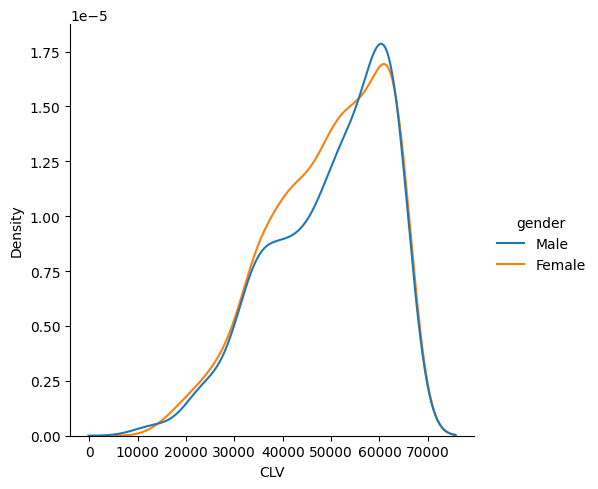

In [45]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='gender')

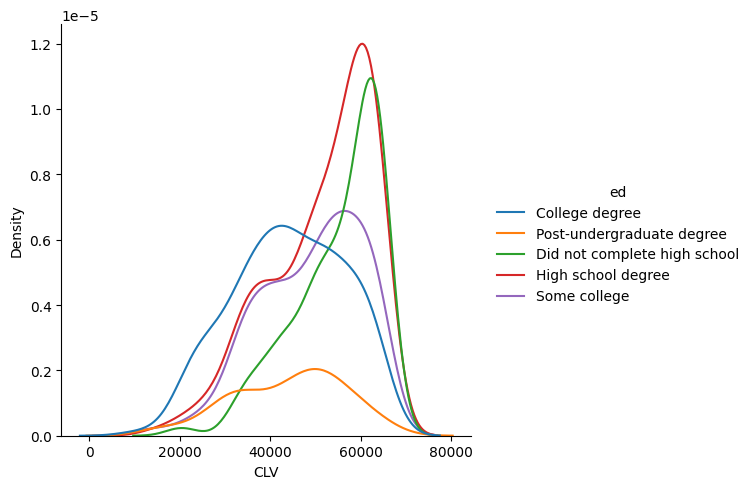

In [46]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='ed')

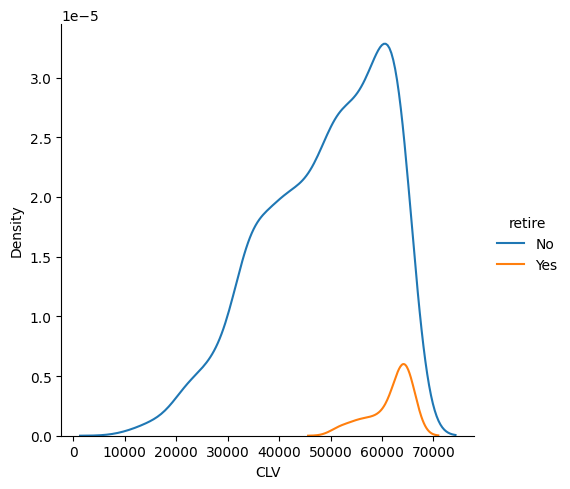

In [47]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='retire')

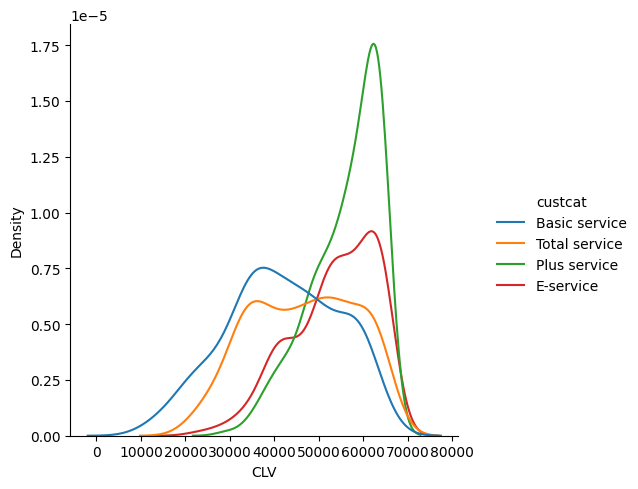

In [48]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='custcat')

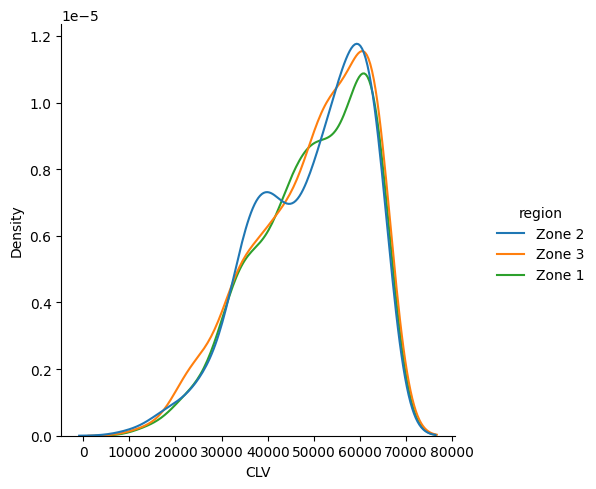

In [49]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='region')

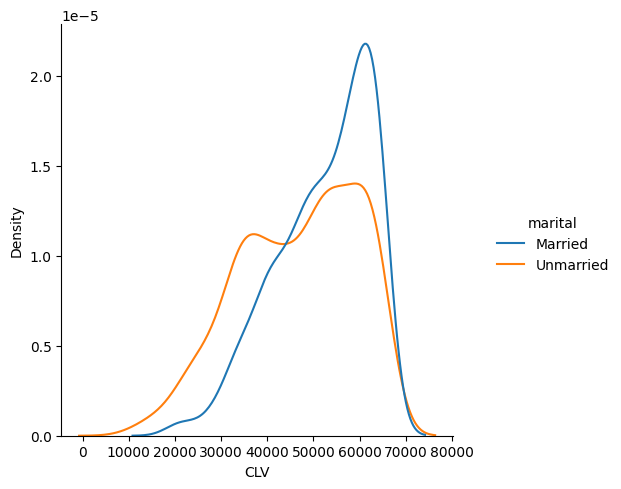

In [50]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='marital')


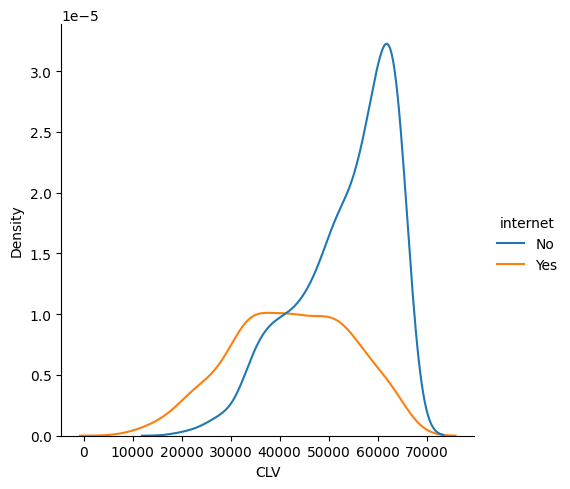

In [51]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='internet')


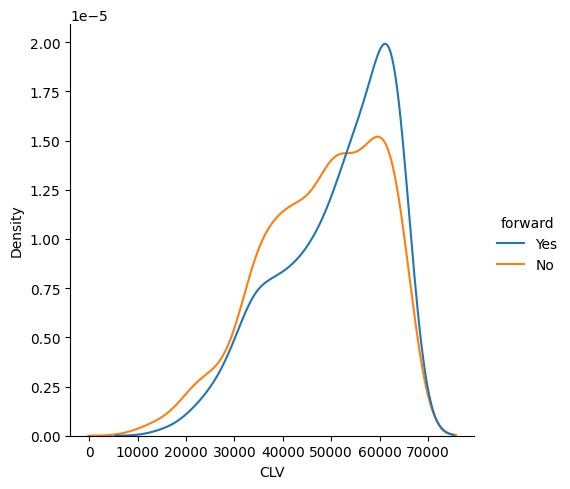

In [52]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='forward')


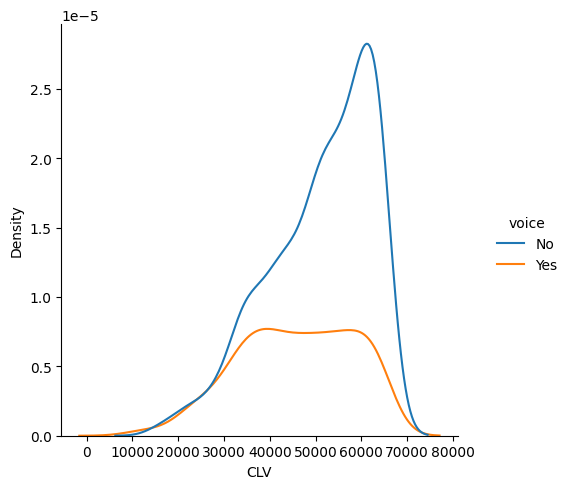

In [53]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='voice')


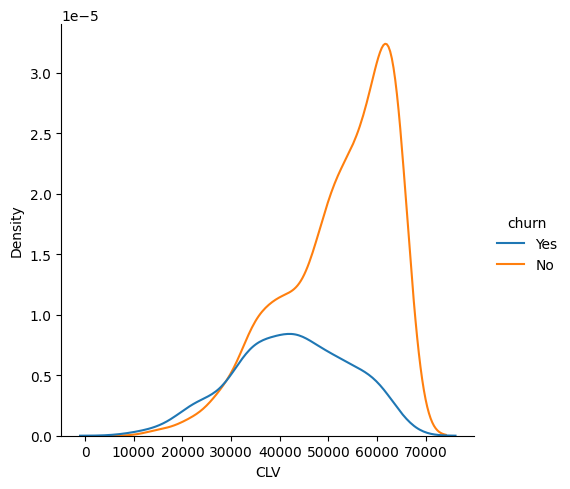

In [54]:
sns.displot(data=raw_data, kind='kde', x='CLV', hue='churn')


## Report

# Understanding Customer Lifetime Value (CLV)

- **CLV Overview**:
  - Helps businesses organize more efficient strategies for customer retention.
  - Shows how customers impact the company during their whole relationship with the company.

- **AFT Models**:
  - Refer to "accelerated failure time" models used in survival or lifetime data analysis.
  - Focus on estimating the time for an event (e.g., churn or product failure) to occur.
  - Assume covariates affect the time to event multiplicatively.
  - Coefficients Types:
    - Positive coefficients: Impact positively on the expected CLV.
    - Negative coefficients: Impact negatively on the expected CLV.
    - Coefficients of 0: Have no impact on the expected CLV.

- **Plot Analysis**:
  - Gender:
    - Males have higher CLV compared to females.
  - Education:
    - Individuals with high school education have the highest CLV among other educational degrees.
  - Retirement Status:
    - Non-retired individuals have significantly higher CLV compared to retired individuals.
  - Customer Service Tier:
    - Plus customer service users have the highest CLV due to generating more revenue.
  - Region:
    - Differences between regions are not significant in terms of CLV.
  - Marital Status:
    - Married individuals produce higher CLV than unmarried individuals.

- **Strategies**:
  - Focus on Younger Customers:
    - Majority of the most valuable segments are young customers.
    - Listen to their feedback to attract more young customers with high CLV values.
  - Segment Customers Based on CLV:
    - Provide special offers and discounts based on CLV segments.
    - Offer more benefits to younger customers and provide memberships of different levels.
  - Address Internet and Voice Issues:
    - Customers with no internet and no voice have higher CLV.
    - Resolve issues for customers having internet problems to improve CLV.

